In [ ]:
# import libararies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# create directory
! mkdir ~/.Chess


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [ ]:
#copy dataset to Runtime machine
!cp /content/drive/MyDrive/Colab_Notebooks/ChessDs/200k_blitz_rapid_classical_bullet.csv ~/.Chess/Chess_dataset.csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Read Dataset

In [ ]:
data_dir = '/root/.Chess/Chess_dataset.csv'

pd.set_option('display.max_columns', 623)

df = pd.read_csv(data_dir)

# sampling data
df = df.sample(frac=0.3,random_state=1)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-64-fb3e6247f45d>:5: DtypeWarning: Columns (19,20,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,243,244,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620) 

,Index,Index.1,Black,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,Round,Site,Termination,TimeControl,UTCDate,UTCTime,White,WhiteElo,WhiteRatingDiff,BlackTitle,WhiteTitle,Move_ply_1,Move_ply_2,Move_ply_3,Move_ply_4,Move_ply_5,Move_ply_6,Move_ply_7,Move_ply_8,Move_ply_9,Move_ply_10,Move_ply_11,Move_ply_12,Move_ply_13,Move_ply_14,Move_ply_15,Move_ply_16,Move_ply_17,Move_ply_18,Move_ply_19,Move_ply_20,Move_ply_21,Move_ply_22,Move_ply_23,Move_ply_24,Move_ply_25,Move_ply_26,Move_ply_27,Move_ply_28,Move_ply_29,Move_ply_30,Move_ply_31,Move_ply_32,Move_ply_33,Move_ply_34,Move_ply_35,Move_ply_36,Move_ply_37,Move_ply_38,Move_ply_39,Move_ply_40,Move_ply_41,Move_ply_42,Move_ply_43,Move_ply_44,Move_ply_45,Move_ply_46,Move_ply_47,Move_ply_48,Move_ply_49,Move_ply_50,Move_ply_51,Move_ply_52,Move_ply_53,Move_ply_54,Move_ply_55,Move_ply_56,Move_ply_57,Move_ply_58,Move_ply_59,Move_ply_60,Move_ply_61,Move_ply_62,Move_ply_63,Move_ply_64,Move_ply_65,Move_ply_66,Move_ply_67,Move_ply_68,Move_ply_69,Move_ply_70,Move_ply_71,Move_ply_72,Move_ply_73,Move_ply_74,Move_ply_75,Move_ply_76,Move_ply_77,Move_ply_78,Move_ply_79,Move_ply_80,Move_ply_81,Move_ply_82,Move_ply_83,Move_ply_84,Move_ply_85,Move_ply_86,Move_ply_87,Move_ply_88,Move_ply_89,Move_ply_90,Move_ply_91,Move_ply_92,Move_ply_93,Move_ply_94,Move_ply_95,Move_ply_96,Move_ply_97,Move_ply_98,Move_ply_99,Move_ply_100,Move_ply_101,Move_ply_102,Move_ply_103,Move_ply_104,Move_ply_105,Move_ply_106,Move_ply_107,Move_ply_108,Move_ply_109,Move_ply_110,Move_ply_111,Move_ply_112,Move_ply_113,Move_ply_114,Move_ply_115,Move_ply_116,Move_ply_117,Move_ply_118,Move_ply_119,Move_ply_120,Move_ply_121,Move_ply_122,Move_ply_123,Move_ply_124,Move_ply_125,Move_ply_126,Move_ply_127,Move_ply_128,Move_ply_129,Move_ply_130,Move_ply_131,Move_ply_132,Move_ply_133,Move_ply_134,Move_ply_135,Move_ply_136,Move_ply_137,Move_ply_138,Move_ply_139,Move_ply_140,Move_ply_141,Move_ply_142,Move_ply_143,Move_ply_144,Move_ply_145,Move_ply_146,Move_ply_147,Move_ply_148,Move_ply_149,Move_ply_150,Move_ply_151,Move_ply_152,Move_ply_153,Move_ply_154,Move_ply_155,Move_ply_156,Move_ply_157,Move_ply_158,Move_ply_159,Move_ply_160,Move_ply_161,Move_ply_162,Move_ply_163,Move_ply_164,Move_ply_165,Move_ply_166,Move_ply_167,Move_ply_168,Move_ply_169,Move_ply_170,Move_ply_171,Move_ply_172,Move_ply_173,Move_ply_174,Move_ply_175,Move_ply_176,Move_ply_177,Move_ply_178,Move_ply_179,Move_ply_180,Move_ply_181,Move_ply_182,Move_ply_183,Move_ply_184,Move_ply_185,Move_ply_186,Move_ply_187,Move_ply_188,Move_ply_189,Move_ply_190,Move_ply_191,Move_ply_192,Move_ply_193,Move_ply_194,Move_ply_195,Move_ply_196,Move_ply_197,Move_ply_198,Move_ply_199,Move_ply_200,Eval_ply_1,Eval_ply_2,Eval_ply_3,Eval_ply_4,Eval_ply_5,Eval_ply_6,Eval_ply_7,Eval_ply_8,Eval_ply_9,Eval_ply_10,Eval_ply_11,Eval_ply_12,Eval_ply_13,Eval_ply_14,Eval_ply_15,Eval_ply_16,Eval_ply_17,Eval_ply_18,Eval_ply_19,Eval_ply_20,Eval_ply_21,Eval_ply_22,Eval_ply_23,Eval_ply_24,Eval_ply_25,Eval_ply_26,Eval_ply_27,Eval_ply_28,Eval_ply_29,Eval_ply_30,Eval_ply_31,Eval_ply_32,Eval_ply_33,Eval_ply_34,Eval_ply_35,Eval_ply_36,Eval_ply_37,Eval_ply_38,Eval_ply_39,Eval_ply_40,Eval_ply_41,Eval_ply_42,Eval_ply_43,Eval_ply_44,Eval_ply_45,Eval_ply_46,Eval_ply_47,Eval_ply_48,Eval_ply_49,Eval_ply_50,Eval_ply_51,Eval_ply_52,Eval_ply_53,Eval_ply_54,Eval_ply_55,Eval_ply_56,Eval_ply_57,Eval_ply_58,Eval_ply_59,Eval_ply_60,Eval_ply_61,Eval_ply_62,Eval_ply_63,Eval_ply_64,Eval_ply_65,Eval_ply_66,Eval_ply_67,Eval_ply_68,Eval_ply_69,Eval_ply_70,Eval_ply_71,Eval_ply_72,Eval_ply_73,Eval_ply_74,Eval_ply_75,Eval_ply_76,Eval_ply_77,Eval_ply_78,Eval_ply_79,Eval_ply_80,Eval_ply_81,Eval_ply_82,Eval_ply_83,Eval_ply_84,Eval_ply_85,Eval_ply_86,Eval_ply_87,Eval_ply_88,Eval_ply_89,Eval_ply_90,Eval_ply_91,Eval_ply_92,Eval_ply_93,Eval_ply_94,Eval_ply_95,Eval_ply_96,Eval_ply_97,Eval_ply_98,Eval_ply_99,Eval_ply_100,Eval_ply_101,Eval_ply_102,Eval_ply_103,Eval_ply_104,Eval_ply_105,Eval_ply_106,Eval_ply_107,Eval_ply_108,Eval_ply_109,Eval_ply_110,Eval_p

In [ ]:
df.columns.values

In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BlackElo,BlackRatingDiff,WhiteElo,WhiteRatingDiff,Eval_ply_1,Eval_ply_2,Eval_ply_3,Eval_ply_4,Eval_ply_5,Eval_ply_6,Eval_ply_7,Eval_ply_8,Eval_ply_9,Eval_ply_10,Eval_ply_11,Eval_ply_12,Eval_ply_13,Eval_ply_14,Eval_ply_15,Eval_ply_16,Eval_ply_17,Eval_ply_18,Eval_ply_19,Eval_ply_20,Eval_ply_21,Eval_ply_22,Eval_ply_23,Eval_ply_24,Eval_ply_25,Eval_ply_26,Eval_ply_27,Eval_ply_28,Eval_ply_29,Eval_ply_30,Eval_ply_31,Eval_ply_32,Eval_ply_33,Eval_ply_34,Eval_ply_35,Eval_ply_36,Eval_ply_37,Eval_ply_38,Eval_ply_39,Eval_ply_40,Eval_ply_41,Eval_ply_42,Eval_ply_43,Eval_ply_44,Eval_ply_45,Eval_ply_46,Eval_ply_47,Eval_ply_48,Eval_ply_49,Eval_ply_50,Eval_ply_51,Eval_ply_52,Eval_ply_53,Eval_ply_54,Eval_ply_55,Eval_ply_56,Eval_ply_57,Eval_ply_58,Eval_ply_59,Eval_ply_60,Eval_ply_61,Eval_ply_62,Eval_ply_63,Eval_ply_64,Eval_ply_65,Eval_ply_66,Eval_ply_67,Eval_ply_68,Eval_ply_69,Eval_ply_70,Eval_ply_71,Eval_ply_72,Eval_ply_73,Eval_ply_74,Eval_ply_75,Eval_ply_76,Eval_ply_77,Eval_ply_78,Eval_ply_79,Eval_ply_80,Eval_ply_81,Eval_ply_82,Eval_ply_83,Eval_ply_84,Eval_ply_85,Eval_ply_86,Eval_ply_87,Eval_ply_88,Eval_ply_89,Eval_ply_90,Eval_ply_91,Eval_ply_92,Eval_ply_93,Eval_ply_94,Eval_ply_95,Eval_ply_96,Eval_ply_97,Eval_ply_98,Eval_ply_99,Eval_ply_100,Eval_ply_101,Eval_ply_102,Eval_ply_103,Eval_ply_104,Eval_ply_105,Eval_ply_106,Eval_ply_107,Eval_ply_108,Eval_ply_109,Eval_ply_110,Eval_ply_111,Eval_ply_112,Eval_ply_113,Eval_ply_114,Eval_ply_115,Eval_ply_116,Eval_ply_117,Eval_ply_118,Eval_ply_119,Eval_ply_120,Eval_ply_121,Eval_ply_122,Eval_ply_123,Eval_ply_124,Eval_ply_125,Eval_ply_126,Eval_ply_127,Eval_ply_128,Eval_ply_129,Eval_ply_130,Eval_ply_131,Eval_ply_132,Eval_ply_133,Eval_ply_134,Eval_ply_135,Eval_ply_136,Eval_ply_137,Eval_ply_138,Eval_ply_139,Eval_ply_140,Eval_ply_141,Eval_ply_142,Eval_ply_143,Eval_ply_144,Eval_ply_145,Eval_ply_146,Eval_ply_147,Eval_ply_148,Eval_ply_149,Eval_ply_150,Eval_ply_151,Eval_ply_152,Eval_ply_153,Eval_ply_154,Eval_ply_155,Eval_ply_156,Eval_ply_157,Eval_ply_158,Eval_ply_159,Eval_ply_160,Eval_ply_161,Eval_ply_162,Eval_ply_163,Eval_ply_164,Eval_ply_165,Eval_ply_166,Eval_ply_167,Eval_ply_168,Eval_ply_169,Eval_ply_170,Eval_ply_171,Eval_ply_172,Eval_ply_173,Eval_ply_174,Eval_ply_175,Eval_ply_176,Eval_ply_177,Eval_ply_178,Eval_ply_179,Eval_ply_180,Eval_ply_181,Eval_ply_182,Eval_ply_183,Eval_ply_184,Eval_ply_185,Eval_ply_186,Eval_ply_187,Eval_ply_188,Eval_ply_189,Eval_ply_190,Eval_ply_191,Eval_ply_192,Eval_ply_193,Eval_ply_194,Eval_ply_195,Eval_ply_196,Eval_ply_197,Eval_ply_198,Eval_ply_199,Eval_ply_200,InitialTime,Increment,WhiteACPL,BlackACPL,Standardized_BlackElo,Standardized_WhiteElo
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,6

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 49673 to 47374
Columns: 623 entries, Index to Weekday
dtypes: float64(4), int64(4), object(615)
memory usage: 285.6+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
null_counts = df.isna().sum()
null_columns = null_counts[null_counts > 0]
print(null_columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BlackRatingDiff      142
WhiteRatingDiff      142
BlackTitle         59767
WhiteTitle         59791
Move_ply_6            10
                   ...  
Clock_ply_196      59928
Clock_ply_197      59929
Clock_ply_198      59933
Clock_ply_199      59934
Clock_ply_200      59939
Length: 590, dtype: int64


#Data cleaning and preprocessing

In [ ]:
# Drop unnecessary columns
df.drop(['Index', 'Index.1','Round','Site'], axis=1, inplace=True)

# Convert 'Date' and 'UTCDate' to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['UTCDate'] = pd.to_datetime(df['UTCDate'])

# Fill missing ELO and RatingDiff with the mean or zero
df['BlackElo'].fillna(df['BlackElo'].median(), inplace=True)
df['WhiteElo'].fillna(df['WhiteElo'].median(), inplace=True)
df['BlackRatingDiff'].fillna(df['BlackRatingDiff'].median(), inplace=True)
df['WhiteRatingDiff'].fillna(df['WhiteRatingDiff'].median(), inplace=True)

# Fill missing titles with a placeholder like 'None'
df['BlackTitle'].fillna('None', inplace=True)
df['WhiteTitle'].fillna('None', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert time control to separate columns if needed, e.g., '900+10' into two separate columns
df['InitialTime'], df['Increment'] = df['TimeControl'].str.split('+', 1).str

# Convert evaluation and clock times to numeric values (they might be in string format)
for col in df.columns:
    if 'Eval_ply' in col or 'Clock_ply' in col:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace NaNs in moves, evaluations, and clocks with suitable defaults if needed
move_columns = [col for col in df.columns if 'Move_ply' in col]
eval_columns = [col for col in df.columns if 'Eval_ply' in col]
clock_columns = [col for col in df.columns if 'Clock_ply' in col]

df[move_columns] = df[move_columns].fillna('None')
df[eval_columns] = df[eval_columns].fillna(0)
df[clock_columns] = df[clock_columns].fillna('None')

# If columns are still in object type and need to be in numerical, convert them
df['InitialTime'] = pd.to_numeric(df['InitialTime'], errors='coerce')
df['Increment'] = pd.to_numeric(df['Increment'], errors='coerce')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-66-3106e4924773>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['InitialTime'], df['Increment'] = df['TimeControl'].str.split('+', 1).str
<ipython-input-66-3106e4924773>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['InitialTime'], df['Increment'] = df['TimeControl'].str.split('+', 1).str


In [ ]:
# List of evaluation columns for each player
eval_columns_white = [f'Eval_ply_{2*i+1}' for i in range(50)]  # Replace 50 with the number of moves for fine tuning
eval_columns_black = [f'Eval_ply_{2*i+2}' for i in range(50)]

# Function to calculate ACPL for a series of evaluation columns
def calculate_acpl(eval_series):
    # Take the absolute difference between each evaluation
    abs_diff = np.abs(np.diff(eval_series))

    # Take the average of these absolute differences
    acpl = np.mean(abs_diff) if len(abs_diff) > 0 else np.nan

    return acpl

# Calculate ACPL for White and Black players
df['WhiteACPL'] = df[eval_columns_white].apply(calculate_acpl, axis=1)
df['BlackACPL'] = df[eval_columns_black].apply(calculate_acpl, axis=1)

# Show the resulting DataFrame with new ACPL columns
print(df[['WhiteACPL', 'BlackACPL']].head(10))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


        WhiteACPL  BlackACPL
49673    0.991837   0.850000
171551   0.511429   0.534898
5506     0.998776   1.035510
38370    1.011429   1.035306
36930    1.401429   1.254286
167783   3.490612   5.941837
67487    1.130612   3.006122
101486   0.521224   0.532653
131774   1.811020   1.880816
48246    1.204898   1.290000


In [ ]:
# Check for null values in WhiteACPL and BlackACPL columns
white_acpl_nulls = df['WhiteACPL'].isna().sum()
black_acpl_nulls = df['BlackACPL'].isna().sum()

print(f"Number of null values in WhiteACPL column: {white_acpl_nulls}")
print(f"Number of null values in BlackACPL column: {black_acpl_nulls}")

Number of null values in WhiteACPL column: 0
Number of null values in BlackACPL column: 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
null_counts = df.isna().sum()
null_columns = null_counts[null_counts > 0]
print(null_columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Series([], dtype: int64)


#Exploratory Data Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


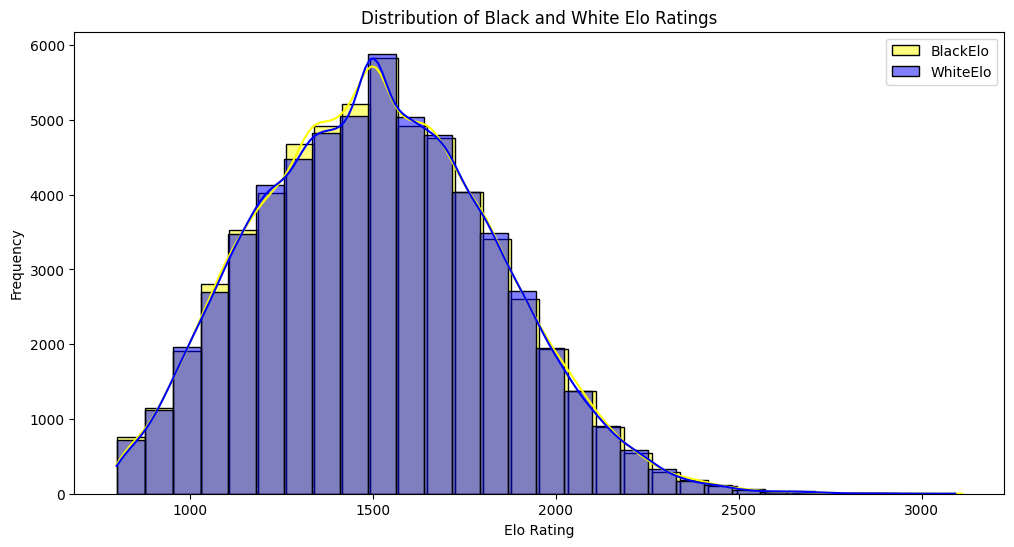

In [ ]:
# Visualizing key features

# Distribution of Black and White Elo ratings
plt.figure(figsize=(12, 6))
sns.histplot(df['BlackElo'], color='yellow', label='BlackElo', kde=True, bins=30)
sns.histplot(df['WhiteElo'], color='blue', label='WhiteElo', kde=True, bins=30, edgecolor='black')
plt.title('Distribution of Black and White Elo Ratings')
plt.xlabel('Elo Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# No need to normalize scalar() in training does it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-19-c0234e3ff236>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("Oranges")
<ipython-input-19-c0234e3ff236>:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


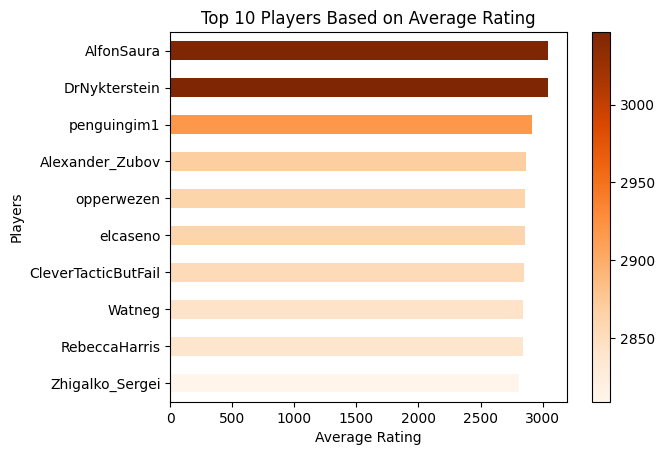

In [ ]:
players = pd.concat([df['White'], df['Black']])
ratings = pd.concat([df['WhiteElo'], df['BlackElo']])

# Create a new DataFrame with 'Player' and 'Rating'
new_df = pd.DataFrame({'Player': players, 'Rating': ratings})

# Group by 'Player' and calculate the average 'Rating'
avg_ratings = new_df.groupby('Player')['Rating'].mean()

# Sort players based on the average 'Rating' and get top 10
top_players = avg_ratings.sort_values(ascending=False).head(10)

# Normalize the ratings for colormap scaling
normalize = plt.Normalize(top_players.min(), top_players.max())

# Create a colormap
colormap = cm.get_cmap("Oranges")

# Plot the top 10 players based on average rating with different colors
ax = top_players.plot(kind='barh', color=[colormap(normalize(value)) for value in top_players])
plt.title('Top 10 Players Based on Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Players')
plt.gca().invert_yaxis()  # to have the player with the highest rating at the top

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])
plt.colorbar(sm)

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


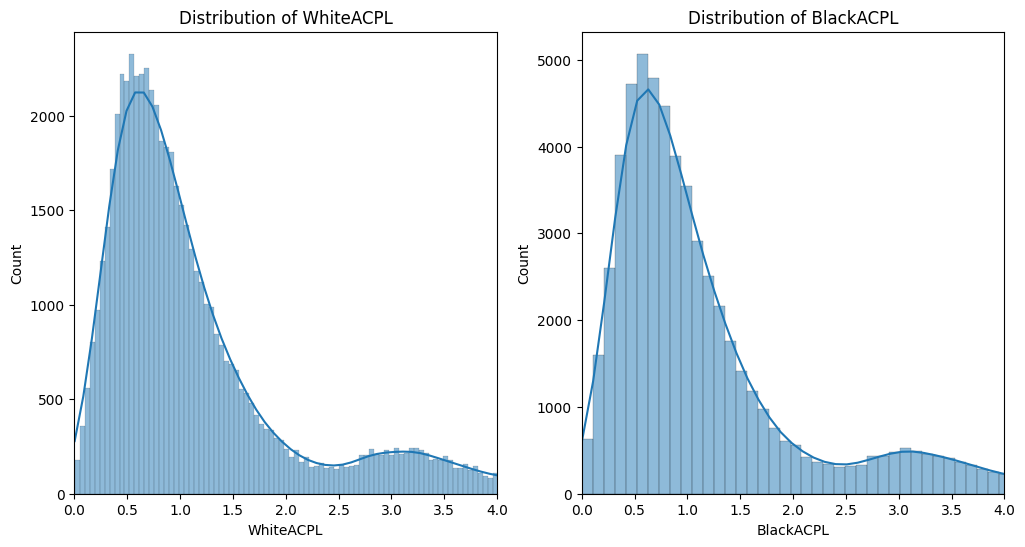

In [ ]:
# Data Distribution  #No need to normalize mess up with GBM model prediction
# Histograms for WhiteACPL and BlackACPL
plt.figure(figsize=(12, 6))

# Plot the histogram for 'WhiteACPL'
plt.subplot(1, 2, 1)
sns.histplot(df['WhiteACPL'], kde=True)  # Set the number of bins
plt.title('Distribution of WhiteACPL')
plt.xlim(0, 4)  # Set the x-axis limit

# Plot the histogram for 'BlackACPL'
plt.subplot(1, 2, 2)
sns.histplot(df['BlackACPL'], kde=True, bins=200)  # Set the number of bins
plt.title('Distribution of BlackACPL')
plt.xlim(0, 4)  # Set the x-axis limit

# Show the plot
plt.show()

In [ ]:
# Checking Association with Target Variables BlackElo and WhiteElo
# Calculating Pearson correlation with all other columns
correlation_matrix = df.corr()
black_elo_corr = correlation_matrix['BlackElo'].sort_values(ascending=False)
white_elo_corr = correlation_matrix['WhiteElo'].sort_values(ascending=False)
# Top 10 positively correlated features with BlackElo
top10_black_elo_corr = black_elo_corr.head(11)[1:]
# Top 10 positively correlated features with WhiteElo
top10_white_elo_corr = white_elo_corr.head(11)[1:]
top10_black_elo_corr, top10_white_elo_corr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-c93433012675>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


(WhiteElo           0.917628
 Eval_ply_3         0.081391
 Eval_ply_5         0.041094
 Eval_ply_7         0.031364
 Eval_ply_11        0.028305
 Eval_ply_9         0.027531
 Eval_ply_15        0.022802
 Eval_ply_13        0.021086
 WhiteRatingDiff    0.020109
 Eval_ply_17        0.018520
 Name: BlackElo, dtype: float64,
 BlackElo       0.917628
 Eval_ply_3     0.091011
 Eval_ply_5     0.054907
 Eval_ply_15    0.054788
 Eval_ply_11    0.054722
 Eval_ply_17    0.053436
 Eval_ply_9     0.051437
 Eval_ply_7     0.051201
 Eval_ply_13    0.049698
 Eval_ply_19    0.049620
 Name: WhiteElo, dtype: float64)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


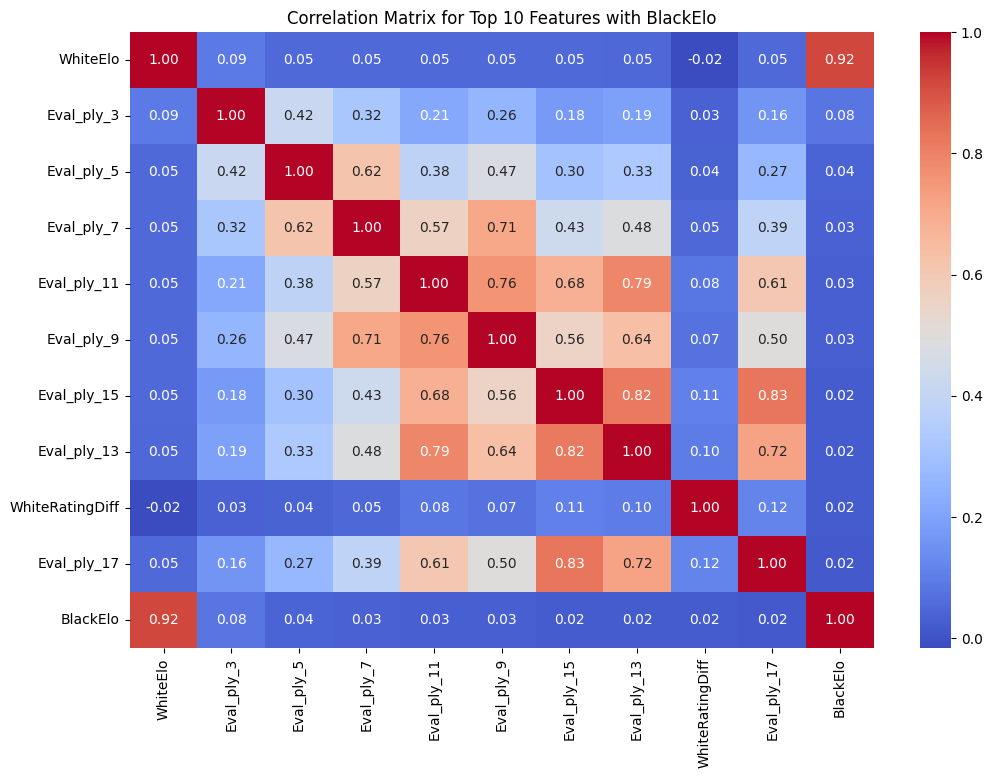

In [ ]:
# Selecting top 10 correlated features for BlackElo and WhiteElo
top10_black_elo_features = top10_black_elo_corr.index.tolist() + ['BlackElo']
top10_white_elo_features = top10_white_elo_corr.index.tolist() + ['WhiteElo']
# Creating correlation matrices for top 10 features
corr_matrix_black_elo = df[top10_black_elo_features].corr()
corr_matrix_white_elo = df[top10_white_elo_features].corr()
# Visualizing the correlation matrix for BlackElo
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_black_elo, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Top 10 Features with BlackElo')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


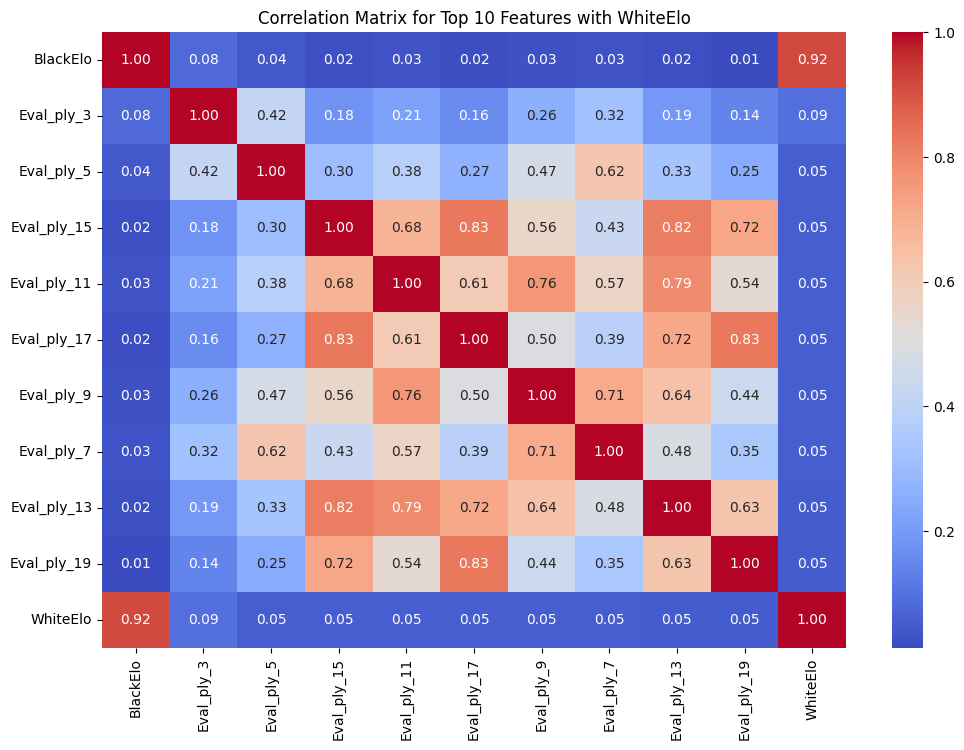

In [ ]:
# Visualizing the correlation matrix for WhiteElo
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_white_elo, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Top 10 Features with WhiteElo')
plt.show()

In [ ]:
df_pred = df[['Black','BlackElo','BlackACPL','BlackRatingDiff','White','WhiteElo','WhiteACPL','WhiteRatingDiff','Result','Termination','Category','InitialTime']]
df_pred.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Black,BlackElo,BlackACPL,BlackRatingDiff,White,WhiteElo,WhiteACPL,WhiteRatingDiff,Result,Termination,Category,InitialTime
3373,JoaoMaiia,1216,1.140000,-13.0,Nubagui,1112,1.107959,13.0,1-0,Normal,Blitz,300
45209,BBD28,1802,0.464286,15.0,mg008,1958,0.511020,-15.0,0-1,Time forfeit,Rapid,600
46258,cemilnadir,1131,2.541633,-11.0,juansolo07,1109,1.153469,20.0,1-0,Normal,Blitz,300
75776,amazingme85,1524,3.432041,-8.0,Chess_Tourist,1500,3.225306,187.0,1-0,Normal,Rapid,600
47374,LOURENZZLSD,1885,1.604286,87.0,cyclo,2030,2.047959,-13.0,0-1,Normal,Blitz,180


In [ ]:
# 1. Basic Statistics
print("Basic statistics for each column:")
df_pred.describe()

Basic statistics for each column:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BlackElo,BlackACPL,BlackRatingDiff,WhiteElo,WhiteACPL,WhiteRatingDiff,InitialTime
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,1511.870717,1.322620,3.213567,1511.388383,1.301614,4.065783,387.451250
std,322.290188,1.308074,29.607704,320.989744,1.279291,31.885632,364.895364
min,800.000000,0.004082,-530.000000,800.000000,0.002449,-592.000000,0.000000
25%,1276.000000,0.553878,-10.000000,1275.000000,0.548163,-10.000000,180.000000
50%,1500.000000,0.891224,-2.000000,1500.000000,0.885102,2.000000,300.000000
75%,1732.000000,1.486378,11.000000,1730.000000,1.473878,11.000000,600.000000
max,3110.000000,20.762449,580.000000,3091.000000,16.272041,663.000000,10800.000000


In [ ]:
# 2. Correlations
print("Correlation between columns:")
corr_matrix = df[['BlackElo','BlackACPL','BlackRatingDiff','White','WhiteElo','WhiteACPL','WhiteRatingDiff','Result','InitialTime']].corr()
print(corr_matrix)

Correlation between columns:
                 BlackElo  BlackACPL  BlackRatingDiff  WhiteElo  WhiteACPL  \
BlackElo         1.000000  -0.100566        -0.022940  0.917628  -0.104402   
BlackACPL       -0.100566   1.000000         0.001680 -0.100168   0.753576   
BlackRatingDiff -0.022940   0.001680         1.000000  0.009998  -0.002847   
WhiteElo         0.917628  -0.100168         0.009998  1.000000  -0.106386   
WhiteACPL       -0.104402   0.753576        -0.002847 -0.106386   1.000000   
WhiteRatingDiff  0.020109  -0.012679        -0.352003 -0.016569  -0.010598   
InitialTime      0.005468  -0.001183         0.017918  0.005175  -0.002067   

                 WhiteRatingDiff  InitialTime  
BlackElo                0.020109     0.005468  
BlackACPL              -0.012679    -0.001183  
BlackRatingDiff        -0.352003     0.017918  
WhiteElo               -0.016569     0.005175  
WhiteACPL              -0.010598    -0.002067  
WhiteRatingDiff         1.000000     0.012362  
InitialTim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-36-91b9e05a1355>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[['BlackElo','BlackACPL','BlackRatingDiff','White','WhiteElo','WhiteACPL','WhiteRatingDiff','Result','InitialTime']].corr()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


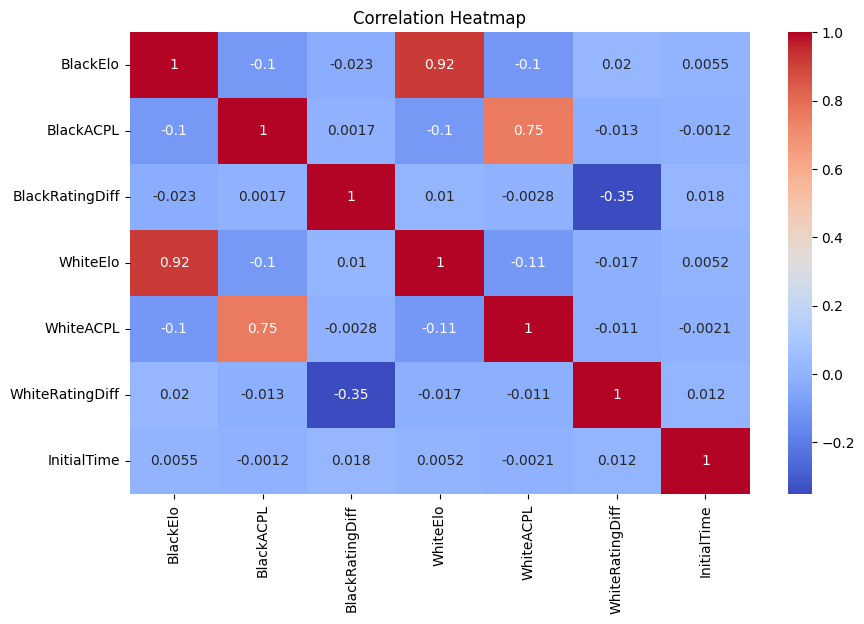

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


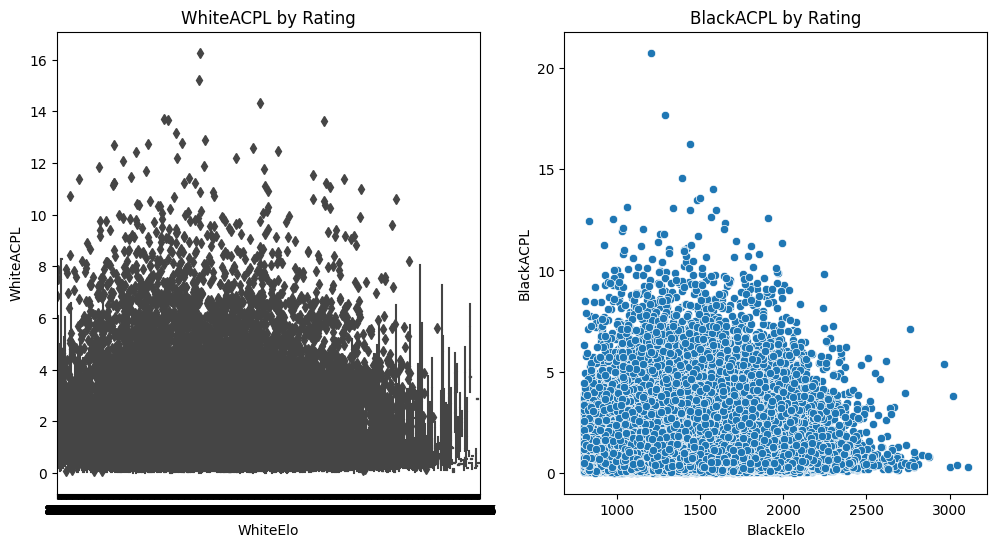

In [ ]:
# Boxplots for centipawn loss by ratings
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='WhiteElo', y='WhiteACPL', data=df)
plt.title('WhiteACPL by Rating')

plt.subplot(1, 2, 2)
sns.scatterplot(x='BlackElo', y='BlackACPL', data=df)
plt.title('BlackACPL by Rating')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


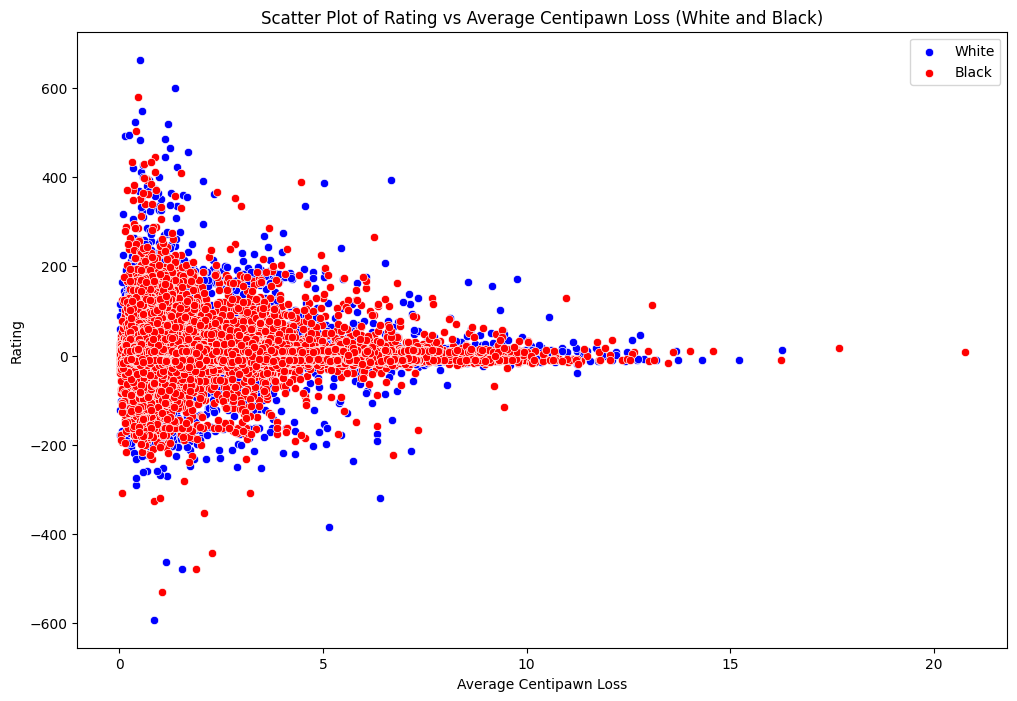

In [ ]:
# Scatter plot of Average Centipawn Loss and Ratingdiff for both White and Black
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='WhiteACPL',
    y='WhiteRatingDiff',
    data=df,
    label='White',
    color='b'
)

sns.scatterplot(
    x='BlackACPL',
    y='BlackRatingDiff',
    data=df,
    label='Black',
    color='r'
)

plt.title('Scatter Plot of Rating vs Average Centipawn Loss (White and Black)')
plt.xlabel('Average Centipawn Loss')
plt.ylabel('Rating')
plt.legend()
plt.show()
#there is not a strong relationship between aCPL and rating/Elo!

##Outlier Detection

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


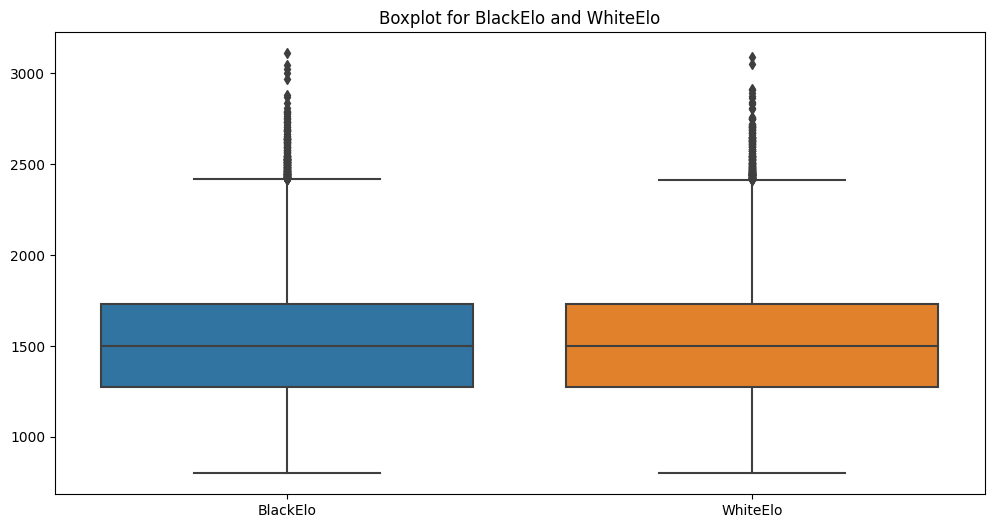

In [ ]:
# Outlier Detection

# Boxplot for BlackElo and WhiteElo to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['BlackElo', 'WhiteElo']])
plt.title('Boxplot for BlackElo and WhiteElo')
plt.show()

In [ ]:
def remove_outliers(df, columns):
    """
    Replace outliers with the median in the DataFrame for the specified columns.

    :param df: DataFrame
    :param columns: list of column names to remove outliers from
    :return: DataFrame with outliers replaced by median
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        median = df[col].median()

        # Define bounds for the outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with median
        df[col] = df[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = remove_outliers(df, ['BlackElo'])
df = remove_outliers(df, ['WhiteElo'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


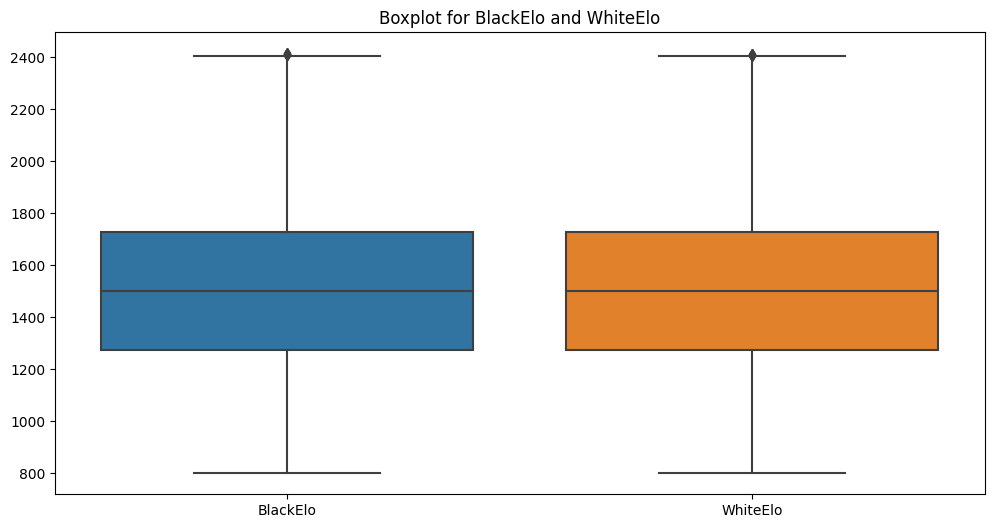

In [ ]:
# Boxplot for BlackElo and WhiteElo to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['BlackElo', 'WhiteElo']])
plt.title('Boxplot for BlackElo and WhiteElo')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


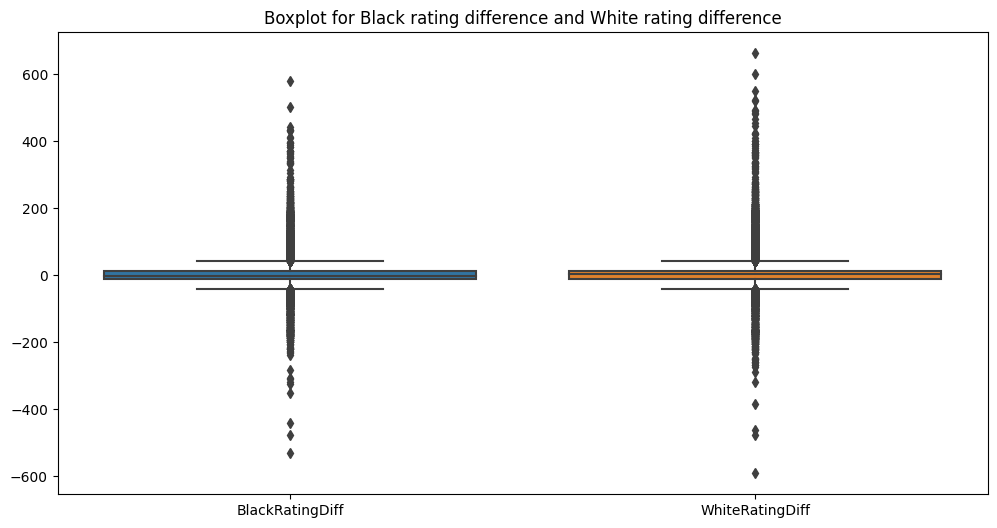

In [ ]:
# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['BlackRatingDiff', 'WhiteRatingDiff']])
plt.title('Boxplot for Black rating difference and White rating difference')
plt.show()


In [ ]:
df = remove_outliers(df, ['BlackRatingDiff'])
df = remove_outliers(df, ['WhiteRatingDiff'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


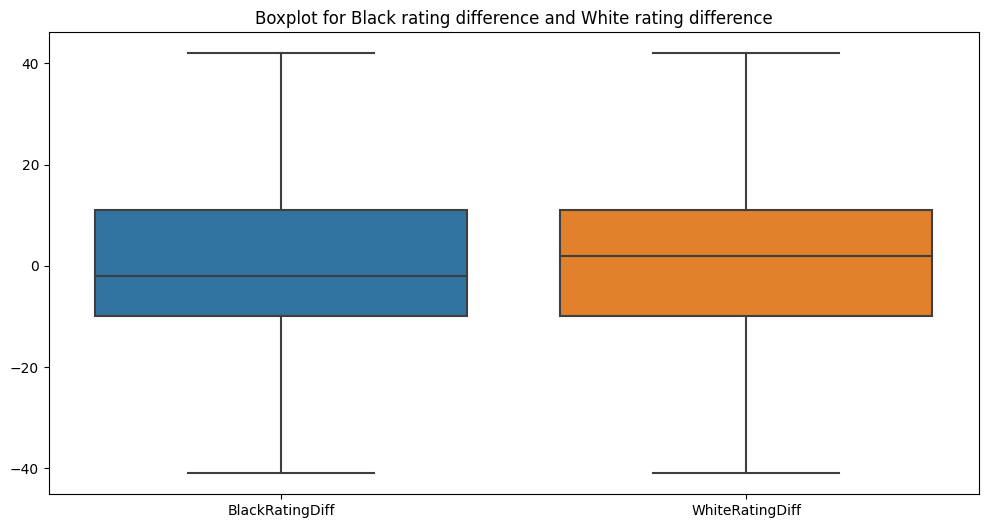

In [ ]:
# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['BlackRatingDiff', 'WhiteRatingDiff']])
plt.title('Boxplot for Black rating difference and White rating difference')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


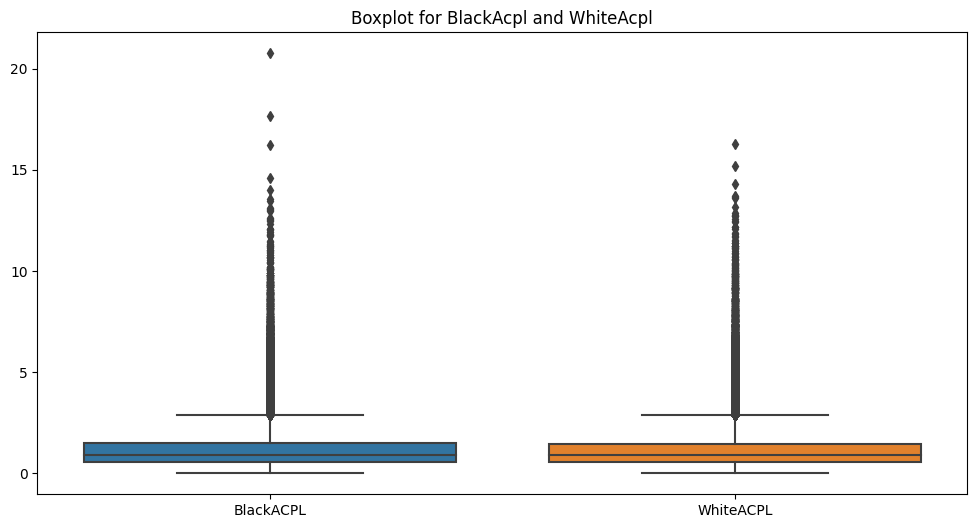

In [ ]:
# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['BlackACPL', 'WhiteACPL']])
plt.title('Boxplot for BlackAcpl and WhiteAcpl')
plt.show()

In [ ]:
df = remove_outliers(df, ['BlackACPL']) # run 2 times
df = remove_outliers(df, ['WhiteACPL'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


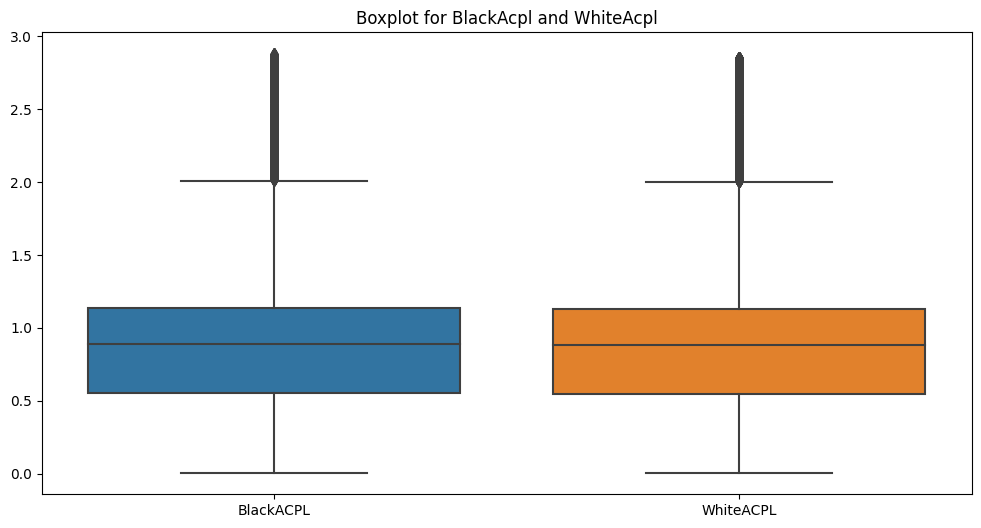

In [ ]:
# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['BlackACPL', 'WhiteACPL']])
plt.title('Boxplot for BlackAcpl and WhiteAcpl')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


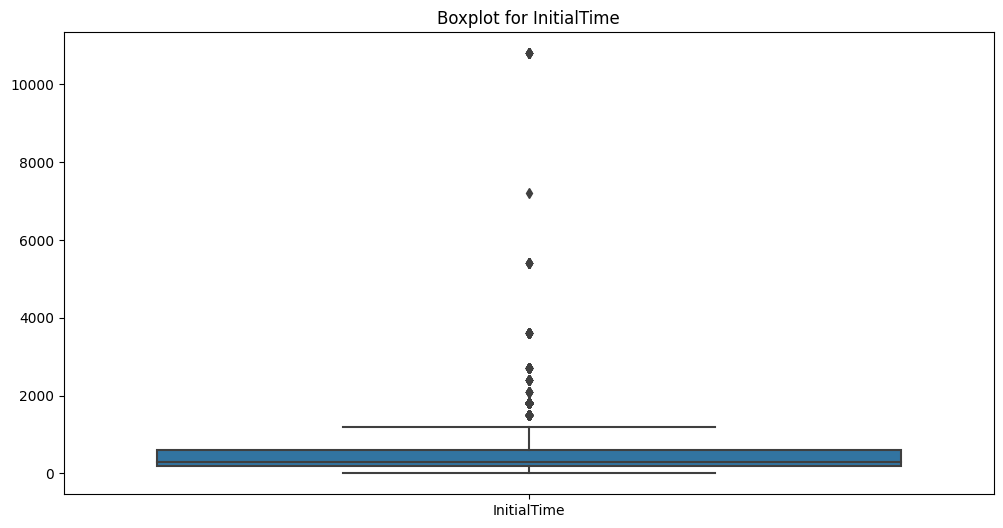

In [ ]:
# Boxplot for BlackElo and WhiteElo to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['InitialTime']])
plt.title('Boxplot for InitialTime')
plt.show()

In [ ]:
df = remove_outliers(df, ['InitialTime'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


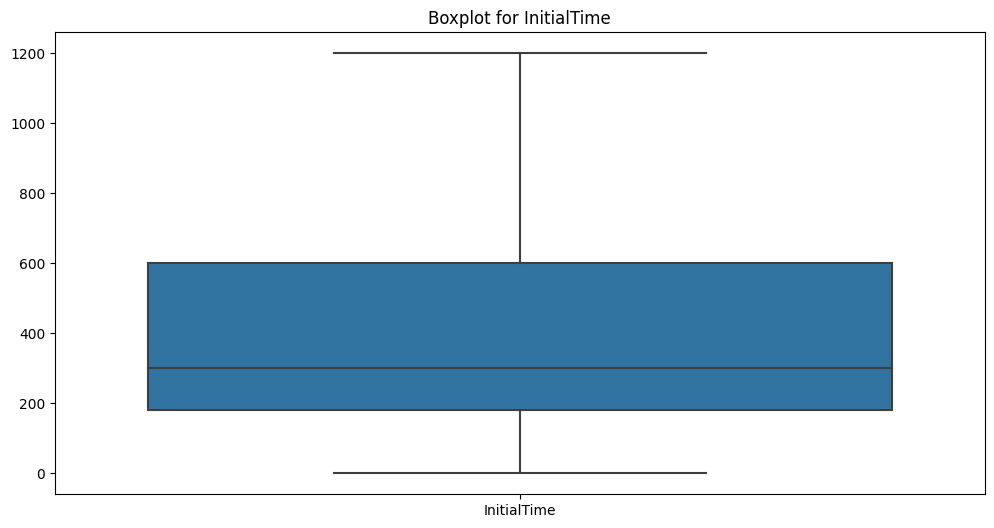

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['InitialTime']])
plt.title('Boxplot for InitialTime')
plt.show()

##Normalization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


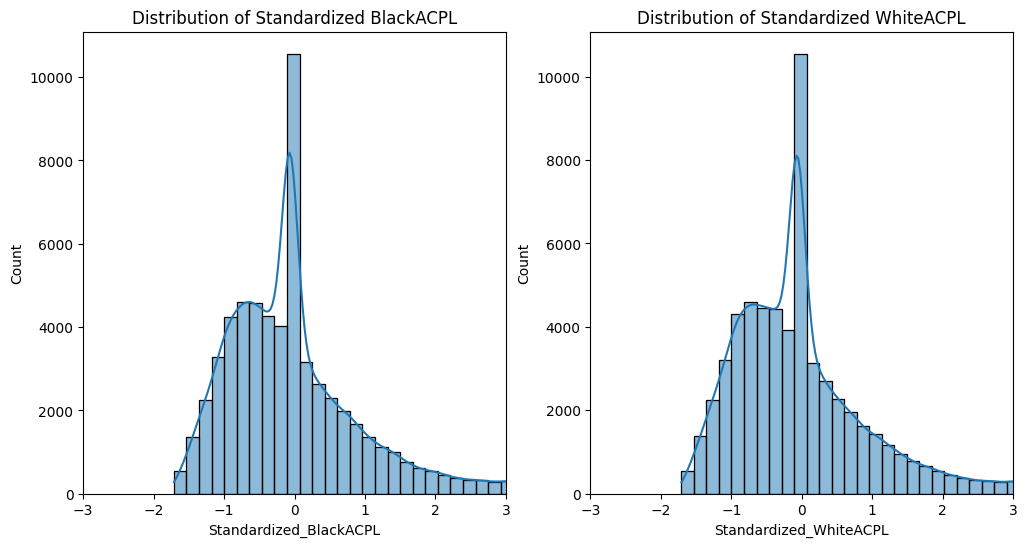

In [ ]:
# Standardize 'BlackACPL' and 'WhiteACPL'
df['Standardized_BlackACPL'] = (df['BlackACPL'] - df['BlackACPL'].mean()) / df['BlackACPL'].std()
df['Standardized_WhiteACPL'] = (df['WhiteACPL'] - df['WhiteACPL'].mean()) / df['WhiteACPL'].std()

# Plotting the standardized 'BlackElo' and 'WhiteElo'
plt.figure(figsize=(12, 6))

# Plotting 'Standardized_BlackElo'
plt.subplot(1, 2, 1)
sns.histplot(df['Standardized_BlackACPL'], kde=True, bins=30)
plt.title('Distribution of Standardized BlackACPL')
plt.xlim(-3, 3)  # Set the x-axis limit from -3 to 3

# Plotting 'Standardized_WhiteElo'
plt.subplot(1, 2, 2)
sns.histplot(df['Standardized_WhiteACPL'], kde=True, bins=30)
plt.title('Distribution of Standardized WhiteACPL')
plt.xlim(-3, 3)  # Set the x-axis limit from -3 to 3

# Show the plot
plt.show()
# Other features will be normalized using StandardScaler()

In [ ]:
# Frequency distribution of game results
print("\nFrequency distribution of game results:")
print(df['Result'].value_counts())


Frequency distribution of game results:
1-0        100351
0-1         94499
1/2-1/2      5145
*               5
Name: Result, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove rows where the "Result" column is "*"
df = df[df['Result'] != '*']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Replace values in the 'Result' column
df['Result'] = df['Result'].replace({
    '1-0': '1',#Black wins
    '0-1': '2',#White wins
    '1/2-1/2': '0'#draw
}).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df['Result'].unique())

[2 1 0]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compare mean centipawn loss across categories
mean_acpl_by_rating = df_pred.groupby('Category')[['WhiteACPL', 'BlackACPL']].mean()
print("Mean centipawn loss by rating category:")
print(mean_acpl_by_rating)

Mean centipawn loss by rating category:
           WhiteACPL  BlackACPL
Category                       
Blitz       0.894761   0.905972
Bullet      0.967801   0.979769
Classical   0.907981   0.925636
Rapid       0.912131   0.922878


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df['Category'].value_counts())

Blitz        86333
Rapid        45212
Bullet       43253
Classical    25197
Name: Category, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Replace values in the 'Result' column
df['Category'] = df['Category'].replace({
    'Blitz': '1',
    'Rapid': '2',
    'Bullet': '3',
    'Classical': '4'
}).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df['Category'].unique())

[1 2 3 4]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Model Build

## Feature Selection

In [ ]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Black            200000 non-null  object 
 1   BlackElo         200000 non-null  float64
 2   BlackACPL        200000 non-null  float64
 3   BlackRatingDiff  200000 non-null  float64
 4   White            200000 non-null  object 
 5   WhiteElo         200000 non-null  float64
 6   WhiteACPL        200000 non-null  float64
 7   WhiteRatingDiff  200000 non-null  float64
 8   Result           200000 non-null  object 
 9   Termination      200000 non-null  object 
 10  Category         200000 non-null  object 
 11  InitialTime      200000 non-null  float64
dtypes: float64(7), object(5)
memory usage: 18.3+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Feature Engineering
# 1. Normailzation usually not needed for GBM
# 2. Polynomial Features to capture relationships
# 3. GBM model with feature selection and hypertuning best solution for this ds

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Selecting columns with 'Eval_ply' and no zero values
eval_columns = [col for col in df.columns if 'Eval_ply' in col and not (df[col] == 0).any()]

# Selected features based on the correlation matrix
features_black = eval_columns + ['WhiteElo','BlackACPL','InitialTime','Result','WhiteRatingDiff','BlackRatingDiff']
features_white = eval_columns + ['BlackElo','WhiteACPL','InitialTime','Result','BlackRatingDiff','WhiteRatingDiff']

# Target variables
target_black = 'BlackElo'
target_white = 'WhiteElo'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##GBM model

In [ ]:
# Initialize the Standard Scaler
scaler_black = StandardScaler()
scaler_white = StandardScaler()

# Splitting the data for BlackElo prediction
X_black = df[features_black]
y_black = df[target_black]
X_train_black, X_test_black, y_train_black, y_test_black = train_test_split(
    X_black, y_black, test_size=0.2, random_state=0)

# Standardize the features for BlackElo prediction
X_train_black = scaler_black.fit_transform(X_train_black)
X_test_black = scaler_black.transform(X_test_black)

# Building the Gradient Boosting Machines model for BlackElo
gbm_black = GradientBoostingRegressor(random_state=0)
gbm_black.fit(X_train_black, y_train_black)

# Predicting BlackElo and calculating the Mean Squared Error and R2 Score
y_pred_black = gbm_black.predict(X_test_black)
mse_black = mean_squared_error(y_test_black, y_pred_black)
r2_black = r2_score(y_test_black, y_pred_black)
print(f"Mean Squared Error for BlackElo Prediction: {mse_black:.2f}")
print(f"R2 Score for BlackElo Prediction: {r2_black:.2f}")

# Splitting the data for WhiteElo prediction
X_white = df[features_white]
y_white = df[target_white]
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(
    X_white, y_white, test_size=0.2, random_state=0)

# Standardize the features for WhiteElo prediction
X_train_white = scaler_white.fit_transform(X_train_white)
X_test_white = scaler_white.transform(X_test_white)

# Building the Gradient Boosting Machines model for WhiteElo
gbm_white = GradientBoostingRegressor(random_state=0)
gbm_white.fit(X_train_white, y_train_white)

# Predicting WhiteElo and calculating the Mean Squared Error and R2 Score
y_pred_white = gbm_white.predict(X_test_white)
mse_white = mean_squared_error(y_test_white, y_pred_white)
r2_white = r2_score(y_test_white, y_pred_white)
print(f"Mean Squared Error for WhiteElo Prediction: {mse_white:.2f}")
print(f"R2 Score for WhiteElo Prediction: {r2_white:.2f}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error for BlackElo Prediction: 8322.01
R2 Score for BlackElo Prediction: 0.92
Mean Squared Error for WhiteElo Prediction: 8390.92
R2 Score for WhiteElo Prediction: 0.92


In [ ]:
# Assume we are using the first row from the dataset as the single input
single_input_black = df[features_black].iloc[1].values.reshape(1, -1)
single_input_white = df[features_white].iloc[1].values.reshape(1, -1)

# Making a prediction for BlackElo for the single input using the trained model (gbm_black)
single_pred_black = gbm_black.predict(single_input_black)
print(f"Predicted BlackElo for the Single Input: {single_pred_black[0]:.2f}")

# Making a prediction for WhiteElo for the single input using the trained model (gbm_white)
single_pred_white = gbm_white.predict(single_input_white)
print(f"Predicted WhiteElo for the Single Input: {single_pred_white[0]:.2f}")



Predicted BlackElo for the Single Input: 1790.56
Predicted WhiteElo for the Single Input: 1870.05


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the Gradient Boosting Regressor
gbm_black = GradientBoostingRegressor(random_state=0)
gbm_white = GradientBoostingRegressor(random_state=0)

# Initialize GridSearchCV for BlackElo
grid_search_black = GridSearchCV(gbm_black, param_grid, cv=5, n_jobs=-1)
grid_search_black.fit(X_train_black, y_train_black)

# Get the best estimator and print the corresponding scores for BlackElo
best_gbm_black = grid_search_black.best_estimator_
print(f"Best Parameters for BlackElo: {grid_search_black.best_params_}")
print(f"Best Cross-validation Score for BlackElo: {grid_search_black.best_score_:.2f}")

# Evaluate the best model on the test set for BlackElo
y_pred_black = best_gbm_black.predict(X_test_black)
mse_black = mean_squared_error(y_test_black, y_pred_black)
r2_black = r2_score(y_test_black, y_pred_black)
print(f"Mean Squared Error for BlackElo Prediction: {mse_black:.2f}")
print(f"R2 Score for BlackElo Prediction: {r2_black:.2f}")

# Initialize GridSearchCV for WhiteElo
grid_search_white = GridSearchCV(gbm_white, param_grid, cv=5, n_jobs=-1)
grid_search_white.fit(X_train_white, y_train_white)

# Get the best estimator and print the corresponding scores for WhiteElo
best_gbm_white = grid_search_white.best_estimator_
print(f"Best Parameters for WhiteElo: {grid_search_white.best_params_}")
print(f"Best Cross-validation Score for WhiteElo: {grid_search_white.best_score_:.2f}")

# Evaluate the best model on the test set for WhiteElo
y_pred_white = best_gbm_white.predict(X_test_white)
mse_white = mean_squared_error(y_test_white, y_pred_white)
r2_white = r2_score(y_test_white, y_pred_white)
print(f"Mean Squared Error for WhiteElo Prediction: {mse_white:.2f}")
print(f"R2 Score for WhiteElo Prediction: {r2_white:.2f}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Parameters for BlackElo: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 1.0}
Best Cross-validation Score for BlackElo: 0.96
Mean Squared Error for BlackElo Prediction: 4285.26
R2 Score for BlackElo Prediction: 0.96
Best Parameters for WhiteElo: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 1.0}
Best Cross-validation Score for WhiteElo: 0.96
Mean Squared Error for WhiteElo Prediction: 4375.45
R2 Score for WhiteElo Prediction: 0.96


In [ ]:
# Assume single_input_black and single_input_white are your single rows of input data for BlackElo and WhiteElo prediction
single_input_black = X_test_black[0].reshape(1, -1)  # Reshape to 2D array
single_input_white = X_test_white[0].reshape(1, -1)  # Reshape to 2D array

# Predicting BlackElo for a single input
single_pred_black = best_gbm_black.predict(single_input_black)
print(f"Predicted BlackElo for the single input: {single_pred_black[0]:.2f}")

# Predicting WhiteElo for a single input
single_pred_white = best_gbm_white.predict(single_input_white)
print(f"Predicted WhiteElo for the single input: {single_pred_white[0]:.2f}")


Predicted BlackElo for the single input: 1251.90
Predicted WhiteElo for the single input: 1148.93


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Black,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,Termination,TimeControl,UTCDate,UTCTime,White,WhiteElo,WhiteRatingDiff,BlackTitle,WhiteTitle,Move_ply_1,Move_ply_2,Move_ply_3,Move_ply_4,Move_ply_5,Move_ply_6,Move_ply_7,Move_ply_8,Move_ply_9,Move_ply_10,Move_ply_11,Move_ply_12,Move_ply_13,Move_ply_14,Move_ply_15,Move_ply_16,Move_ply_17,Move_ply_18,Move_ply_19,Move_ply_20,Move_ply_21,Move_ply_22,Move_ply_23,Move_ply_24,Move_ply_25,Move_ply_26,Move_ply_27,Move_ply_28,Move_ply_29,Move_ply_30,Move_ply_31,Move_ply_32,Move_ply_33,Move_ply_34,Move_ply_35,Move_ply_36,Move_ply_37,Move_ply_38,Move_ply_39,Move_ply_40,Move_ply_41,Move_ply_42,Move_ply_43,Move_ply_44,Move_ply_45,Move_ply_46,Move_ply_47,Move_ply_48,Move_ply_49,Move_ply_50,Move_ply_51,Move_ply_52,Move_ply_53,Move_ply_54,Move_ply_55,Move_ply_56,Move_ply_57,Move_ply_58,Move_ply_59,Move_ply_60,Move_ply_61,Move_ply_62,Move_ply_63,Move_ply_64,Move_ply_65,Move_ply_66,Move_ply_67,Move_ply_68,Move_ply_69,Move_ply_70,Move_ply_71,Move_ply_72,Move_ply_73,Move_ply_74,Move_ply_75,Move_ply_76,Move_ply_77,Move_ply_78,Move_ply_79,Move_ply_80,Move_ply_81,Move_ply_82,Move_ply_83,Move_ply_84,Move_ply_85,Move_ply_86,Move_ply_87,Move_ply_88,Move_ply_89,Move_ply_90,Move_ply_91,Move_ply_92,Move_ply_93,Move_ply_94,Move_ply_95,Move_ply_96,Move_ply_97,Move_ply_98,Move_ply_99,Move_ply_100,Move_ply_101,Move_ply_102,Move_ply_103,Move_ply_104,Move_ply_105,Move_ply_106,Move_ply_107,Move_ply_108,Move_ply_109,Move_ply_110,Move_ply_111,Move_ply_112,Move_ply_113,Move_ply_114,Move_ply_115,Move_ply_116,Move_ply_117,Move_ply_118,Move_ply_119,Move_ply_120,Move_ply_121,Move_ply_122,Move_ply_123,Move_ply_124,Move_ply_125,Move_ply_126,Move_ply_127,Move_ply_128,Move_ply_129,Move_ply_130,Move_ply_131,Move_ply_132,Move_ply_133,Move_ply_134,Move_ply_135,Move_ply_136,Move_ply_137,Move_ply_138,Move_ply_139,Move_ply_140,Move_ply_141,Move_ply_142,Move_ply_143,Move_ply_144,Move_ply_145,Move_ply_146,Move_ply_147,Move_ply_148,Move_ply_149,Move_ply_150,Move_ply_151,Move_ply_152,Move_ply_153,Move_ply_154,Move_ply_155,Move_ply_156,Move_ply_157,Move_ply_158,Move_ply_159,Move_ply_160,Move_ply_161,Move_ply_162,Move_ply_163,Move_ply_164,Move_ply_165,Move_ply_166,Move_ply_167,Move_ply_168,Move_ply_169,Move_ply_170,Move_ply_171,Move_ply_172,Move_ply_173,Move_ply_174,Move_ply_175,Move_ply_176,Move_ply_177,Move_ply_178,Move_ply_179,Move_ply_180,Move_ply_181,Move_ply_182,Move_ply_183,Move_ply_184,Move_ply_185,Move_ply_186,Move_ply_187,Move_ply_188,Move_ply_189,Move_ply_190,Move_ply_191,Move_ply_192,Move_ply_193,Move_ply_194,Move_ply_195,Move_ply_196,Move_ply_197,Move_ply_198,Move_ply_199,Move_ply_200,Eval_ply_1,Eval_ply_2,Eval_ply_3,Eval_ply_4,Eval_ply_5,Eval_ply_6,Eval_ply_7,Eval_ply_8,Eval_ply_9,Eval_ply_10,Eval_ply_11,Eval_ply_12,Eval_ply_13,Eval_ply_14,Eval_ply_15,Eval_ply_16,Eval_ply_17,Eval_ply_18,Eval_ply_19,Eval_ply_20,Eval_ply_21,Eval_ply_22,Eval_ply_23,Eval_ply_24,Eval_ply_25,Eval_ply_26,Eval_ply_27,Eval_ply_28,Eval_ply_29,Eval_ply_30,Eval_ply_31,Eval_ply_32,Eval_ply_33,Eval_ply_34,Eval_ply_35,Eval_ply_36,Eval_ply_37,Eval_ply_38,Eval_ply_39,Eval_ply_40,Eval_ply_41,Eval_ply_42,Eval_ply_43,Eval_ply_44,Eval_ply_45,Eval_ply_46,Eval_ply_47,Eval_ply_48,Eval_ply_49,Eval_ply_50,Eval_ply_51,Eval_ply_52,Eval_ply_53,Eval_ply_54,Eval_ply_55,Eval_ply_56,Eval_ply_57,Eval_ply_58,Eval_ply_59,Eval_ply_60,Eval_ply_61,Eval_ply_62,Eval_ply_63,Eval_ply_64,Eval_ply_65,Eval_ply_66,Eval_ply_67,Eval_ply_68,Eval_ply_69,Eval_ply_70,Eval_ply_71,Eval_ply_72,Eval_ply_73,Eval_ply_74,Eval_ply_75,Eval_ply_76,Eval_ply_77,Eval_ply_78,Eval_ply_79,Eval_ply_80,Eval_ply_81,Eval_ply_82,Eval_ply_83,Eval_ply_84,Eval_ply_85,Eval_ply_86,Eval_ply_87,Eval_ply_88,Eval_ply_89,Eval_ply_90,Eval_ply_91,Eval_ply_92,Eval_ply_93,Eval_ply_94,Eval_ply_95,Eval_ply_96,Eval_ply_97,Eval_ply_98,Eval_ply_99,Eval_ply_100,Eval_ply_101,Eval_ply_102,Eval_ply_103,Eval_ply_104,Eval_ply_105,Eval_ply_106,Eval_ply_107,Eval_ply_108,Eval_ply_109,Eval_ply_110,Eval_ply_111,Eval_ply_112,Eval_

In [ ]:

# Selecting 1000 rows of the dataset for prediction
sample_data_black = df[features_black + [target_black]].sample(frac=0.005, random_state=0)
sample_data_white = df[features_white + [target_white]].sample(frac=0.005, random_state=0)

# Specify the path where you want to save the Excel file
output_path = '/content/drive/MyDrive/Colab_Notebooks/predicted_output.xlsx'
# Making predictions for BlackElo and WhiteElo for the sample data
sample_data_black['Predicted_BlackElo'] = best_gbm_black.predict(sample_data_black[features_black])
sample_data_white['Predicted_WhiteElo'] = best_gbm_white.predict(sample_data_white[features_white])

# Exporting the sample data with actual and predicted output to an Excel sheet
with pd.ExcelWriter(output_path) as writer:
    sample_data_black.to_excel(writer, sheet_name='BlackElo_Predictions', index=False)
    sample_data_white.to_excel(writer, sheet_name='WhiteElo_Predictions', index=False)

print("Predicted output exported to '{output_path}'")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


Predicted output exported to '{output_path}'
